# Customer Churn Prediction
Customer churn (aka customer attrition) occurs when customers or subscribers stop doing business with a company or service.<br>
It is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import seaborn as sn

%matplotlib inline

**Load the data**<br>
(and process it)

In [42]:
df = pd.read_csv("data.csv")
df.drop('customerID', axis='columns', inplace=True)
# 20 fields now

In [43]:
df.TotalCharges.values   # strings!! (should be numeric)

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [44]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]     # check which records are problematic
df = df[df.TotalCharges!=' ']                                   # drop the records with blank TotalCharges
print (df.shape)
df.TotalCharges = pd.to_numeric(df.TotalCharges)

(7032, 20)


In [45]:
df.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

Logically, more tenure should mean less churn rate.<br>
Let's visualize the data.

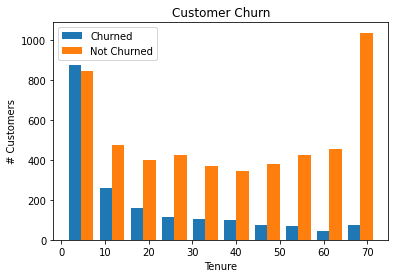

In [46]:
# tenure

no = df[df.Churn=='No'].tenure
yes = df[df.Churn=='Yes'].tenure

plt.xlabel("Tenure")
plt.ylabel("# Customers")
plt.title("Customer Churn")

plt.hist([yes,no])
plt.legend(['Churned','Not Churned'])

Can conclude that for the present case, higher tenure sees less churn.<br>
<pre>-----</pre>

In [47]:
for column in df:
    if df[column].dtypes=='object':
        if column in ['gender', 'Partner', 'Churn']:
            print(f'{column}\t\t\t{df[column].unique()}')
        elif column in ['DeviceProtection', 'PaperlessBilling']:
            print(f'{column}\t{df[column].unique()}')
        else:
            print(f'{column}\t\t{df[column].unique()}')

gender			['Female' 'Male']
Partner			['Yes' 'No']
Dependents		['No' 'Yes']
PhoneService		['No' 'Yes']
MultipleLines		['No phone service' 'No' 'Yes']
InternetService		['DSL' 'Fiber optic' 'No']
OnlineSecurity		['No' 'Yes' 'No internet service']
OnlineBackup		['Yes' 'No' 'No internet service']
DeviceProtection	['No' 'Yes' 'No internet service']
TechSupport		['No' 'Yes' 'No internet service']
StreamingTV		['No' 'Yes' 'No internet service']
StreamingMovies		['No' 'Yes' 'No internet service']
Contract		['Month-to-month' 'One year' 'Two year']
PaperlessBilling	['Yes' 'No']
PaymentMethod		['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn			['No' 'Yes']


In [48]:
df = df.replace('No internet service', 'No')
df = df.replace('No phone service', 'No')

yes_no = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
for col in yes_no:
    if col=='gender':
        df[col].replace({'Female':1,'Male':0}, inplace=True)
    else:
        df[col].replace({'Yes': 1,'No': 0}, inplace=True)

# Convert all the categorical variables into dummy variables
# for each column with more than 2 fields, we create new fields (one hot encoding)
df = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])

In [49]:
df.sample(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3575,0,0,0,0,59,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


Scale all columns to get values in [0,1]

In [50]:
cols = ['tenure','MonthlyCharges','TotalCharges']
df[cols] = MinMaxScaler().fit_transform(df[cols])

Split data into training set and test set (80-20 ratio)

In [51]:
Y = df['Churn']
X = df.drop('Churn',axis='columns')
X_train, X_test, Y_train, Y_test = train_test_split (X,Y, test_size=0.2, random_state=5)

**Neural Network**
<pre>
Layer               Units           Activation
Input layer         26              
Hidden_1            26              ReLU
Hidden_2            15              ReLU
Output              1               Sigmoid
</pre>

In [52]:
# dense layer means the neurons of the layer are connected to every neuron of its preceding layer

model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',   # because this is binary classification (churn / not churn)
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 0s 772us/step - loss: 0.4685 - accuracy: 0.7714
Epoch 2/100
176/176 [==============================] - 0s 807us/step - loss: 0.4264 - accuracy: 0.7984
Epoch 3/100
176/176 [==============================] - 0s 674us/step - loss: 0.4191 - accuracy: 0.8020
Epoch 4/100
176/176 [==============================] - 0s 651us/step - loss: 0.4152 - accuracy: 0.8032
Epoch 5/100
176/176 [==============================] - 0s 693us/step - loss: 0.4136 - accuracy: 0.8039
Epoch 6/100
176/176 [==============================] - 0s 669us/step - loss: 0.4111 - accuracy: 0.8050
Epoch 7/100
176/176 [==============================] - 0s 674us/step - loss: 0.4089 - accuracy: 0.8053
Epoch 8/100
176/176 [==============================] - 0s 624us/step - loss: 0.4076 - accuracy: 0.8068
Epoch 9/100
176/176 [==============================] - 0s 619us/step - loss: 0.4061 - accuracy: 0.8089
Epoch 10/100
176/176 [==============================] - 0s 656us/step - l

In [53]:
model.evaluate(X_test, Y_test)

44/44 [==============================] - 0s 627us/step - loss: 0.4950 - accuracy: 0.7633


[0.49502938985824585, 0.7633262276649475]

In [54]:
Y_pred_0 = model.predict(X_test)
print(Y_pred_0[:10])

Y_pred = []

for element in Y_pred_0:
    if element > 0.5:
        Y_pred.append(1)
    else:
        Y_pred.append(0)

print(Y_pred[:10])

[[0.39221692]
 [0.4666936 ]
 [0.00751141]
 [0.7295599 ]
 [0.32882112]
 [0.90594876]
 [0.02479598]
 [0.35342455]
 [0.08188438]
 [0.5058405 ]]
[0, 0, 0, 1, 0, 1, 0, 0, 0, 1]


Text(33.0, 0.5, 'Actual')

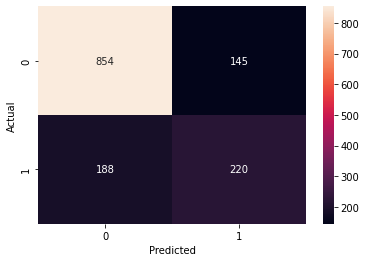

In [55]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=Y_pred)

sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

Precision, Recall, and F1 Score
<pre>
Precision   : #true_positives / (#true_positives + #false_positives)
Recall      : #true_positives / (#true_positives + #false_negatives)
F1 Score    : Harmonic Mean of Precision and Recall = 2*P*R/(P+R)
</pre>

In [56]:
print('Precision for people who didn\'t churn =', round(866/(866+191),2))
print('Precision for people who churned =', round(217/(217+133),2))
print('Recall for people who didn\'t churn =', round(866/(866+133),2))
print('Recall for people who churned =', round(217/(217+191),2))

Precision for people who didn't churn = 0.82
Precision for people who churned = 0.62
Recall for people who didn't churn = 0.87
Recall for people who churned = 0.53


In [57]:
model.save('model_saved.h5')        # used in the Flask app!

Misc (tests, etc.)

In [58]:
print(X.dtypes)
print(X.shape)

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
Contract_Month-to-month        

In [59]:
df1 = pd.read_csv("data.csv")
df1[pd.to_numeric(df1.TotalCharges,errors='coerce').isnull()]     # check which records are problematic
df1 = df1[df1.TotalCharges!=' ']                                   # drop the records with blank TotalCharges
print (df1.shape)
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
print(max(df1['tenure']), min(df1['tenure']))
print(max(df1['MonthlyCharges']), min(df1['MonthlyCharges']))
print(max(df1['TotalCharges']), min(df1['TotalCharges']))

(7032, 21)
72 1
118.75 18.25
8684.8 18.8


In [60]:
# checking for first record in data.csv
pred = model.predict([[1,0,1,0,0.0,0,0,0,1,0,0,0,0,1,(29.85-18.25)/(118.75-18.25),(29.85-18.8)/(8684.8-18.8),1,0,0,1,0,0,0,0,1,0]])
# probab = model.predict_proba([[1,0,1,0,0.0,0,0,0,1,0,0,0,0,1,(29.85-18.25)/(118.75-18.25),(29.85-18.8)/(8684.8-18.8),1,0,0,1,0,0,0,0,1,0]])
if pred>0.5:
    print('Likely to churn')
else:
    print('Likely not to churn')
print(pred[0,0])

pred = model.predict([[0,0,0,0,0.0,1,1,1,1,1,1,1,1,1,(29.85-18.25)/(118.75-18.25),(29.85-18.8)/(8684.8-18.8),1,0,0,1,0,0,1,0,0,0]])
print(pred)

Likely to churn
0.8423282
[[0.16254103]]
